In [125]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df=pd.read_csv("stores.csv")

In [127]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [128]:
df.isnull().any().sum()

0

In [129]:
df.duplicated().any().sum()

0

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [131]:
#As we can see there is not duplicate or null values in our dataset, so we can move to exploration part

In [132]:
df.corr()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,1.000000,-0.058705,-0.055707,-0.010029,0.071486
Store_Area,-0.058705,1.000000,0.998891,-0.041423,0.097474
Items_Available,-0.055707,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.010029,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.071486,0.097474,0.098849,0.008629,1.000000


You can see there is high correlation between items available and store area. Like in real life, as store gets bigger, items that it contains increases.

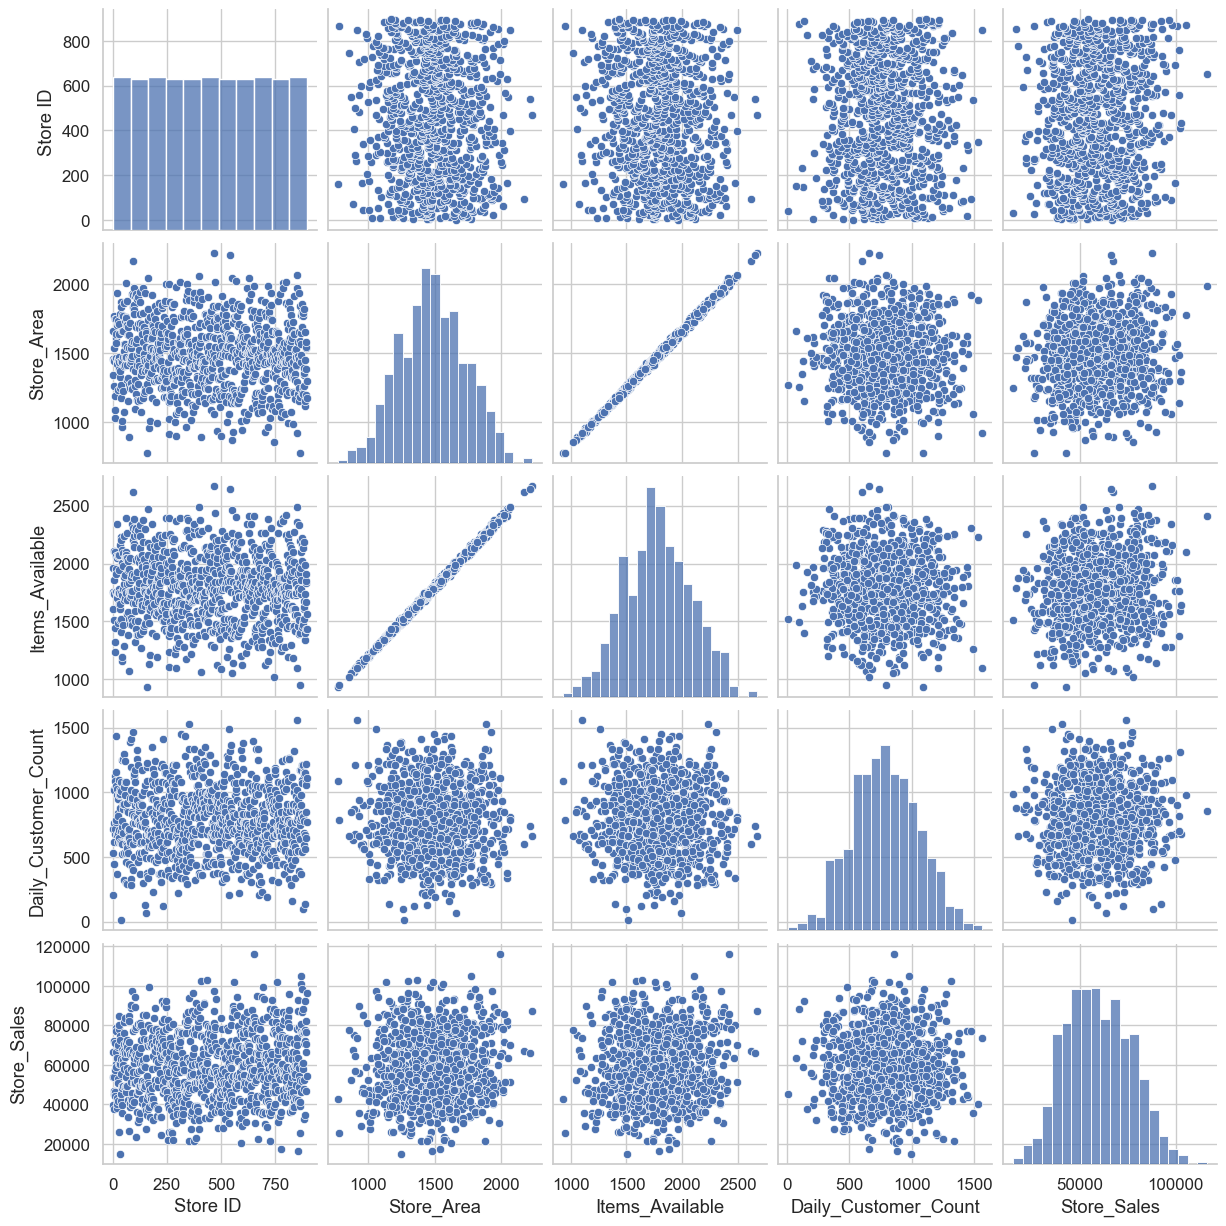

In [133]:
sns.pairplot(data=df)
plt.show()

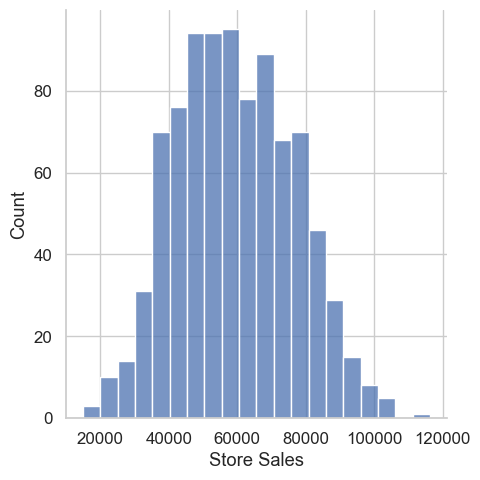

In [134]:

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.displot(
    df["Store_Sales"], kde=False, bins=20
).set(xlabel='Store Sales', ylabel='Count');
plt.show()

We can see store sales are normally distributed.

In [135]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

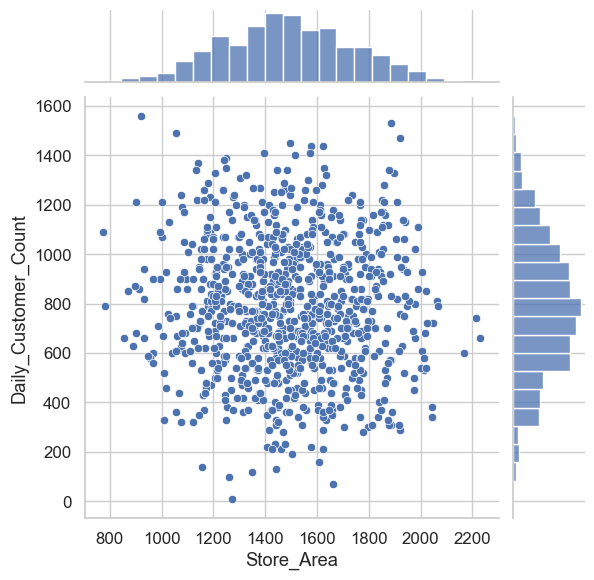

In [136]:
sns.jointplot(x=df["Store_Area"], y=df['Daily_Customer_Count']);
plt.show()

There is no distinctive relation between store area and daily customer count.

In [137]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

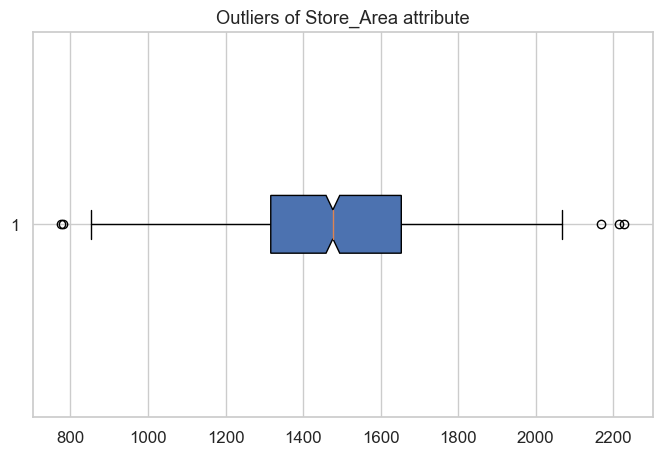

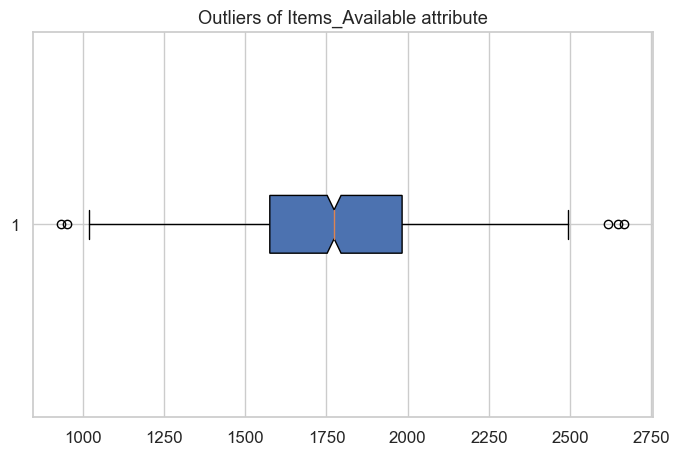

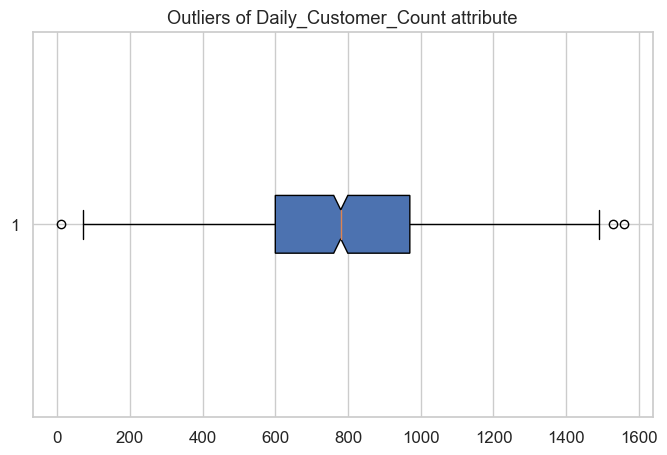

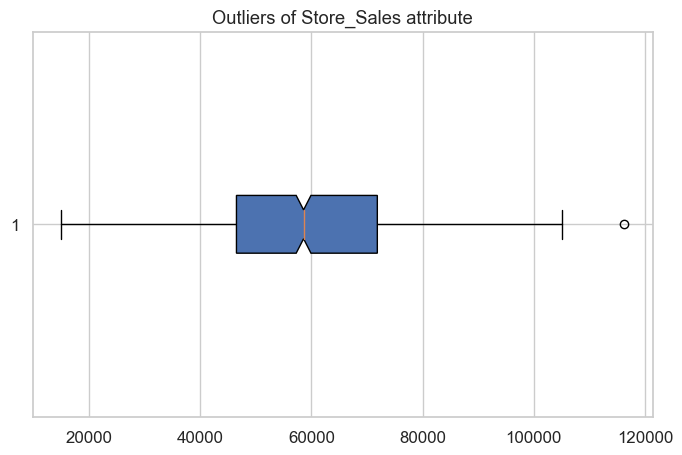

In [138]:
columns=[ 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales']
for i in columns:
    plt.boxplot(df[i], patch_artist = True,
                    notch ='True', vert = 0)
    plt.title("Outliers of "+ i+ " attribute")
    plt.show()

    Dots that are out of boxplot indicates outliers in our data. In Store_Area and Items_Available attribute, there is more outliers than others. For further informations for boxplots, there is a link in citation segment. 

In [139]:
#Clearing outliers
all_outlier={}
for i in df.columns:
    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound = df[i].quantile(0.25) - (1.5*IQR)
    upper_bound = df[i].quantile(0.75) + (1.5*IQR)
    all_outlier[i] =[lower_bound, upper_bound]

In [140]:
all_outlier

{'Store ID ': [-446.5, 1343.5],
 'Store_Area': [811.625, 2158.625],
 'Items_Available': [964.625, 2593.625],
 'Daily_Customer_Count': [45.0, 1525.0],
 'Store_Sales': [8516.25, 109886.25]}

In [141]:
for i in df.columns:
    df.loc[df[i]>all_outlier[i][1], i] = all_outlier[i][1]
    df.loc[df[i]<all_outlier[i][0], i] = all_outlier[i][0]

In [142]:
px.box(df)

In [143]:
#As we can see this, there is no more outliers. 

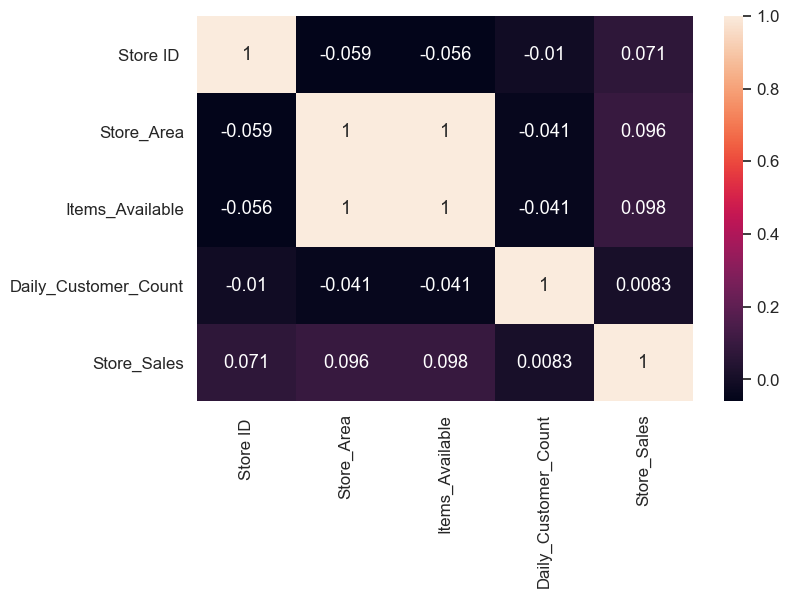

In [144]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Store area and items available attributes seems to have high correlance as stated before.

In [145]:
px.scatter(df,df.Store_Area,df.Store_Sales,color='Store_Sales',size='Store_Area',template='plotly_dark',title='Store_Area Vs Store_Sales')

In [146]:
px.scatter(df,df.Items_Available,df.Store_Sales,color='Store_Sales',size='Items_Available',template='plotly_dark',color_continuous_scale=px.colors.sequential.RdBu,title='Items_Available Vs Store_Sales')

In [147]:
px.scatter(df,df.Daily_Customer_Count,df.Store_Sales,color='Store_Sales',size='Daily_Customer_Count',template='plotly_dark',color_continuous_scale=px.colors.sequential.Plasma,title='Daily_Customer_Count Vs Store_Sales')

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.A good model is one with low inertia and a low number of clusters.

2, 3 and 4 number of clusters can be tried

In [148]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1.0,1659.0,1961.0,530,66490.0
1,2.0,1461.0,1752.0,210,39820.0
2,3.0,1340.0,1609.0,720,54010.0
3,4.0,1451.0,1748.0,620,53730.0
4,5.0,1770.0,2111.0,450,46620.0


In [149]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [150]:
del df["Store ID "]

In [151]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.333845,1781.919782,786.344866,59344.125279
std,249.598303,299.257882,265.150330,17168.248608
min,811.625000,964.625000,45.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2158.625000,2593.625000,1525.000000,109886.250000
